#1 随机数据的KMeans聚类算法

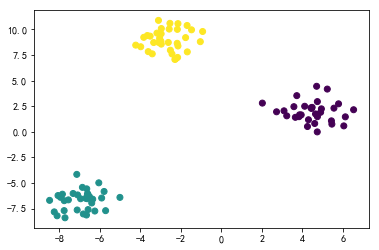

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
all(y == labels)

plt.scatter(X[:,0],X[:,1],c = labels)
plt.show()

#2 绘制SVM在digits数据集上的交叉验证曲线

参数列表长度 10


/anaconda/lib/python3.5/site-packages/matplotlib/mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
/anaconda/lib/python3.5/site-packages/matplotlib/mathtext.py:867: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


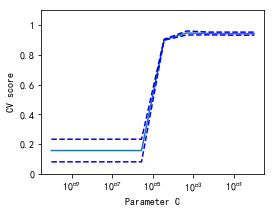

In [10]:
import numpy as np
from sklearn import model_selection, datasets, svm
import matplotlib.pyplot as plt

digits = datasets.load_digits()
x,y = digits.data, digits.target
svc = svm.SVC(kernel='linear')
c_s = np.logspace(-10, 0, 10)
print('参数列表长度', len(c_s))
scores_std = list()
scores = list()
for c in c_s:
    svc.C = c
    this_scores = model_selection.cross_val_score(svc, x, y, n_jobs=4)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))
plt.figure(1, figsize=(4,3))
plt.clf()
plt.semilogx(c_s, scores)
plt.semilogx(c_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(c_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: '%g' % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0,1.1)
plt.show()